In [3]:
import json
import requests
import matplotlib.pyplot as plt

def winLossByRegion(region):
    f = open('riot_key.txt', 'r') #Didn't want to share my key publicly
    key = f.readlines()[0]

    header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": key
    }

    r = requests.get(f'https://{region}.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5', headers = header)
    league = r.json()
    
    w_l_ratio = 0
    count = 0
    for summoner in league['entries']:
        w_l_ratio += summoner['wins']/summoner['losses']
        count += 1
    
    return w_l_ratio/count

In [4]:
regions = ['br1', 'eun1', 'euw1', 'jp1', 'kr', 'la1', 'la2',
           'na1', 'oc1', 'ph2', 'ru', 'sg2', 'th2', 'tr1',
           'tw2', 'vn2']
ratio = []

for region in regions:
    print(f'Win/Loss Ratio for {region} is {winLossByRegion(region)}')
    ratio.append(winLossByRegion(region))
    

Win/Loss Ratio for br1 is 1.2504658863452816
Win/Loss Ratio for eun1 is 1.3985435572876375
Win/Loss Ratio for euw1 is 1.2690337066077688
Win/Loss Ratio for jp1 is 1.2605028005722048
Win/Loss Ratio for kr is 1.3390896398760288
Win/Loss Ratio for la1 is 1.3339354722202383
Win/Loss Ratio for la2 is 1.2969432025500438
Win/Loss Ratio for na1 is 1.25059797829561
Win/Loss Ratio for oc1 is 1.3149890723034827
Win/Loss Ratio for ph2 is 1.485152929140815
Win/Loss Ratio for ru is 1.3407383313793035
Win/Loss Ratio for sg2 is 1.3388251021792479
Win/Loss Ratio for th2 is 1.481417316887348
Win/Loss Ratio for tr1 is 1.2766298727131036
Win/Loss Ratio for tw2 is 1.3670233268655128
Win/Loss Ratio for vn2 is 1.429553900071369


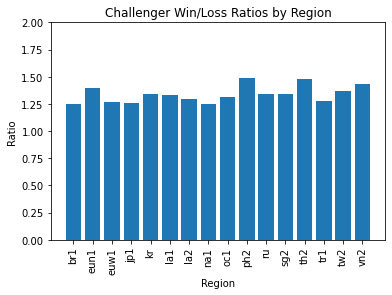

In [10]:
plt.bar(regions, ratio)
plt.title('Challenger Win/Loss Ratios by Region')
plt.xlabel('Region')
plt.ylabel('Ratio')
plt.ylim(0, 2)
plt.xticks(rotation = 90)
plt.savefig('ratio.jpeg')
plt.show()